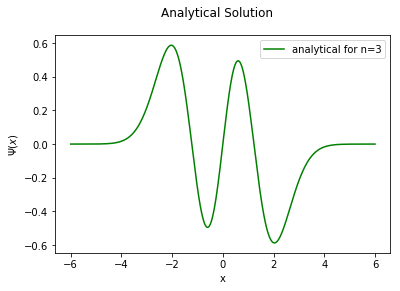

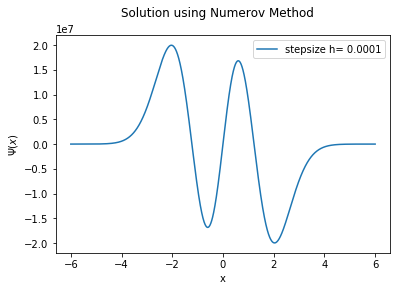

In [18]:
import matplotlib.pyplot as plt
import math

n=3   #Energy Level



N = 60000 # iterations

h = 0.0001
h2 = pow(h,2)


def eps(n):
    return n+1/2

y = 0.0
k = 0.0
x = -1*(N-2)*h

k_minus_2 = eps(n) + (x-2*h)**2 # k_0
k_minus_1 = eps(n) + (x-h)**2 # k_1
a = 0.1
y_minus_2 = 0 # y_0
y_minus_1 = a # y_1

x_out = []
y_out = []

i=-1*N+2

while i<N-2:
  i+=1
  x += h;
  k = 2*eps(n) - pow(x, 2)
  b = h2/12
  y = ( 2*(1-5*b*k_minus_1) * y_minus_1 - (1+b*k_minus_2) * y_minus_2 ) / (1 + b * k)

  # Save for plotting
  x_out.append(x)
  y_out.append(y)

  # Shift for next iteration
  y_minus_2 = y_minus_1
  y_minus_1 = y
  k_minus_2 = k_minus_1
  k_minus_1 = k

#analytical solution

f=np.linspace(-6,6,int(1e3))

def H(n,f):              #Hermite Polynome
    if n==0: return 1
    elif n==1: return 2*f
    elif n>1: return 2*f*H(n-1,f)-2*(n-1)*H(n-2,f)
    
def psi(n,f):            #Analythical solution                                                           
    return -(H(n,f)/(2**n*math.factorial(n)*np.sqrt(np.pi))**(1/2))*np.exp(-f**2/2)


fig0=plt.figure(0)
fig0.suptitle("Analytical Solution")
plt.plot(f, psi(n,f),'g' ,label='analytical for n='+repr(n)+"")
plt.xlabel("x")
plt.ylabel("$\Psi "+"(x)$")
plt.legend()


# Plot
fig1=plt.figure(1)
fig1.suptitle("Solution using Numerov Method")
plt.plot(x_out, y_out, label="stepsize h= "+repr(h)+"")
plt.xlabel("x")
plt.ylabel("$\Psi "+"(x)$")
plt.legend(loc=1)

plt.show()


